<a href="https://colab.research.google.com/github/ZainaNamugabo/MachineLearning/blob/main/Fashion_mnist_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# Get data - it is already split into training and testing sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_test.shape)
X_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(10000, 28, 28)


(60000, 28, 28)

In [ ]:
cloth= X_train[9]
cloth

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   1,   0,   0,   0,   0,   0,   0,   0, 164,  50,   0,   7,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   1,   0,
          0,   1,   1,   0,   0,   5,   0,  45, 217, 255, 176,   0,   6,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   0,   3,
          3,   5,   9,   0,   2,   0,  62, 236, 231, 215,  27,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  29, 244, 231, 234,  74,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,
         23,  41,  59, 111, 134, 138, 226, 202, 217,  22,   0,   1,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0,  35, 179,
        195, 182, 225, 198, 241, 177, 199, 205, 210,  26,   0,   1,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  19,
          0,   0,   0,   0,   0, 235, 243, 198, 119,   0,   3,   1,   3,
          4,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          2,   5,   0,   0,   0, 170, 252, 181, 182,   0,   0,   0,   0,
          0,  19],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   0,   0,   4,   0,  76, 255, 183, 219,   9,   0,   0,  42,
        191, 164],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   2,   0,   0, 237, 198, 204,  75,  47, 221, 221,
        238,  25],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
          0,   1,   2,   1,   0,   0, 209, 212, 229, 255, 254, 232, 227,
        174,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   0,   0,   0,   0,   0, 210, 255,  87, 101, 230, 238,
        105,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   4,   1,   0,   1, 250, 236,   0,   0,   0, 224, 233,
         20,   0],
       [  0,   0,   0,   0,   0,   1,   3,   4,   4,   2,   0,   0,   0,
          1,   0,   2,   0,   0, 204, 185,   0,   0,   0,   6, 227, 202,
          0,   0],
       [  0,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   0,   0, 173, 159,   0,   0,   2,   0,  10, 237, 153,
          0,   0],
       [  0,   0,   1,   0,   0,   0,   0,  40, 138,  21,   0,   0,   2,
          0,   8,   0, 132, 195,   0,   0,   0,   0,   0,   8, 240, 118,
          0,   1],
       [  5,   6,   4,   0, 132, 232, 208, 208, 241, 217,   0,   0,   0,
          1,   0,  29, 217,  35,   0,   9,   0,   2,   0,  25, 238,  58,
          0,   2],
       [  0,   0,   0,   0, 181, 255, 231, 233, 219, 238,  77,   0,   0,
          0,   0, 196, 145,   0,   0,   0,   0,   2,   0,  49, 228,   0,
          0,   2],
       [ 62,  92,   8,   0, 207, 255, 216, 198, 189, 208, 221,   0,   0,
          0, 177, 239,  19,   0,   0,   0,   0,   2,   0,  64, 218,   0,
          0,   3],
       [ 96, 249, 223, 211, 237, 243, 211, 228, 255, 252, 255, 138,  38,
        175, 242, 173,   0,   0,   0,   0,   0,   2,   0,  89, 204,   0,
          0,   2],
       [  0, 197, 240, 240, 237, 219, 222, 244, 235, 243, 244, 255, 255,
        234, 233,  45,   0,   2,   0,   0,   0,   2,   0, 105, 188,   0,
          0,   0],
       [  0, 165, 253, 224, 229, 242, 244, 232, 239, 242, 243, 237, 230,
        230, 207,   0,   0,   1,   0,   0,   0,   9,   0, 120, 165,   0,
          8,   0],
       [  0,  45, 255, 252, 253, 241, 22

In [ ]:
# Scale data between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
# Reshape data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [ ]:
model = Sequential()

model.add(Conv2D(filters= 8, kernel_size=3, activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 14ms/step - accuracy: 0.7609 - loss: 0.7027 - val_accuracy: 0.8653 - val_loss: 0.3879
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.8741 - loss: 0.3584 - val_accuracy: 0.8762 - val_loss: 0.3535
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.8879 - loss: 0.3229 - val_accuracy: 0.8819 - val_loss: 0.3286
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8909 - loss: 0.3066 - val_accuracy: 0.8781 - val_loss: 0.3326
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.8959 - loss: 0.2867 - val_accuracy: 0.8898 - val_loss: 0.3074
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 12ms/step - accuracy: 0.9021 - loss: 0.2731 - val_accuracy: 0.8907 - val_loss: 0.3039
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9043 - loss: 0.2692 - val_accuracy: 0.8940 - val_loss: 0.2960
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9071 -

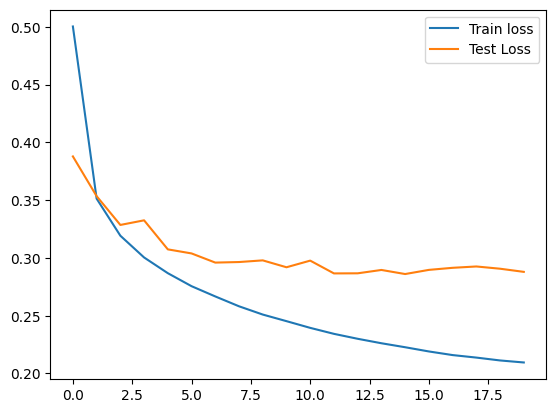

In [ ]:
# Step 3: Fit our model
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    epochs=20)

# Visualize the loss
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

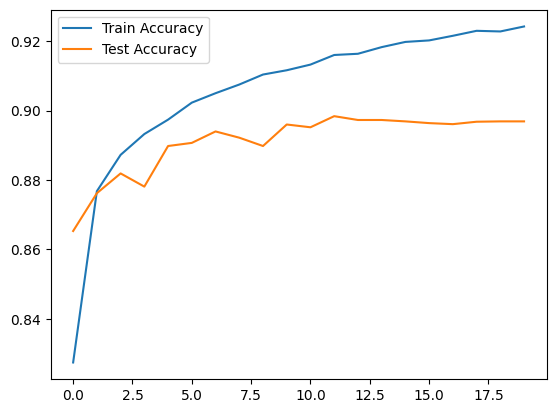

In [ ]:
# Visualize the accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend();

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8922 - loss: 0.2966


[0.28795042634010315, 0.8968999981880188]

In [ ]:
model.save('cloth_classifier.keras')